In [2]:
import os
import matplotlib.pyplot as plt
import random

base_dir = 'itout'

In [5]:
sets = {}
n = 0
for o in os.listdir(base_dir):
    i = 0
    ct_one = 0
    ct_two = 0
    ct_neither = 0
    percents = []
    for line in open(base_dir+'/'+o, 'r'):
        if i == 0:
            dataset = line.strip().split()[-1].split('/')[1]
            one = line.strip().split()[-1].split('/')[-1].split('.')[0]
        elif i == 1:
            two = line.strip().split()[-1].split('/')[-1].split('.')[0]
        elif i == 2:
            model = line.strip().split()[-1]
            title = model + ' ' + dataset + ' percent ' + one + ' versus ' + two
            sets[model] = sets.get(model, {})
            sets[model][title] = sets[model].get(title, (title, []))
            n += 1
        elif len(line.strip()) > 0:
            if 'sent1' in line:
                ct_one += 1
            elif 'sent2' in line:
                ct_two += 1
            else:
                ct_neither += 1
            p = ct_one / (ct_one + ct_two + ct_neither)
            percents = percents + [p]
        else:
            sets[model][title][1].append(percents)
            percents = []
            ct_one, ct_two, ct_neither = 0,0,0
        i += 1

0.0 0.5 0.3333333333333333 0.5 0.6 0.6666666666666666 0.7142857142857143 0.75 0.7777777777777778 0.8 0.8181818181818182 0.8333333333333334 0.7692307692307693 0.7857142857142857 0.8 0.8125 0.8235294117647058 0.8333333333333334 0.8421052631578947 0.85 0.8571428571428571 0.8636363636363636 0.8695652173913043 0.875 0.88 0.8846153846153846 0.8888888888888888 0.8928571428571429 0.896551724137931 0.9 0.8709677419354839 0.875 0.8787878787878788 0.8823529411764706 0.8857142857142857 0.8888888888888888 0.8918918918918919 0.8947368421052632 0.8974358974358975 0.9 0.8780487804878049 0.8809523809523809 0.8837209302325582 0.8863636363636364 0.8888888888888888 0.8913043478260869 0.8936170212765957 0.8958333333333334 0.8979591836734694 0.88 0.8823529411764706 0.8653846153846154 0.8490566037735849 0.8333333333333334 0.8363636363636363 0.8392857142857143 0.8421052631578947 0.8448275862068966 0.847457627118644 0.8333333333333334 0.8360655737704918 0.8225806451612904 0.8253968253968254 0.8125 0.8153846153

0.6606657168760524 0.6606562095265506 0.6606610928033846 0.6606515857940483 0.6606564689968774 0.6606613520591705 0.6606518454565077 0.6606423391274318 0.6606472221822525 0.6606377161932717 0.6606282104778486 0.6606187050359712 0.6606091998676278 0.6605996949728066 0.6605901903514956 0.6605806860036832 0.6605711819293576 0.6605616781285069 0.6605521746011193 0.660542671347183 0.6605331683666863 0.6605236656596173 0.6605285494382184 0.6605334330763034 0.6605383165738783 0.6605431999309491 0.6605480831475221 0.6605385810460901 0.6605290792180329 0.660519577663339 0.6605100763819963 0.6605005753739931 0.6605054587822384 0.6604959581139783 0.6604864577190283 0.6604769575973765 0.6604674577490112 0.6604579581739205 0.6604484588720928 0.6604389598435163 0.660429461088179 0.6604199626060693 0.6604104643971753 0.6604009664614854 0.6603914687989876 0.6603819714096701 0.6603724742935212 0.6603629774505292 0.6603534808806822 0.6603439845839685 0.6603344885603762 0.6603393730227207 0.6603298773385

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



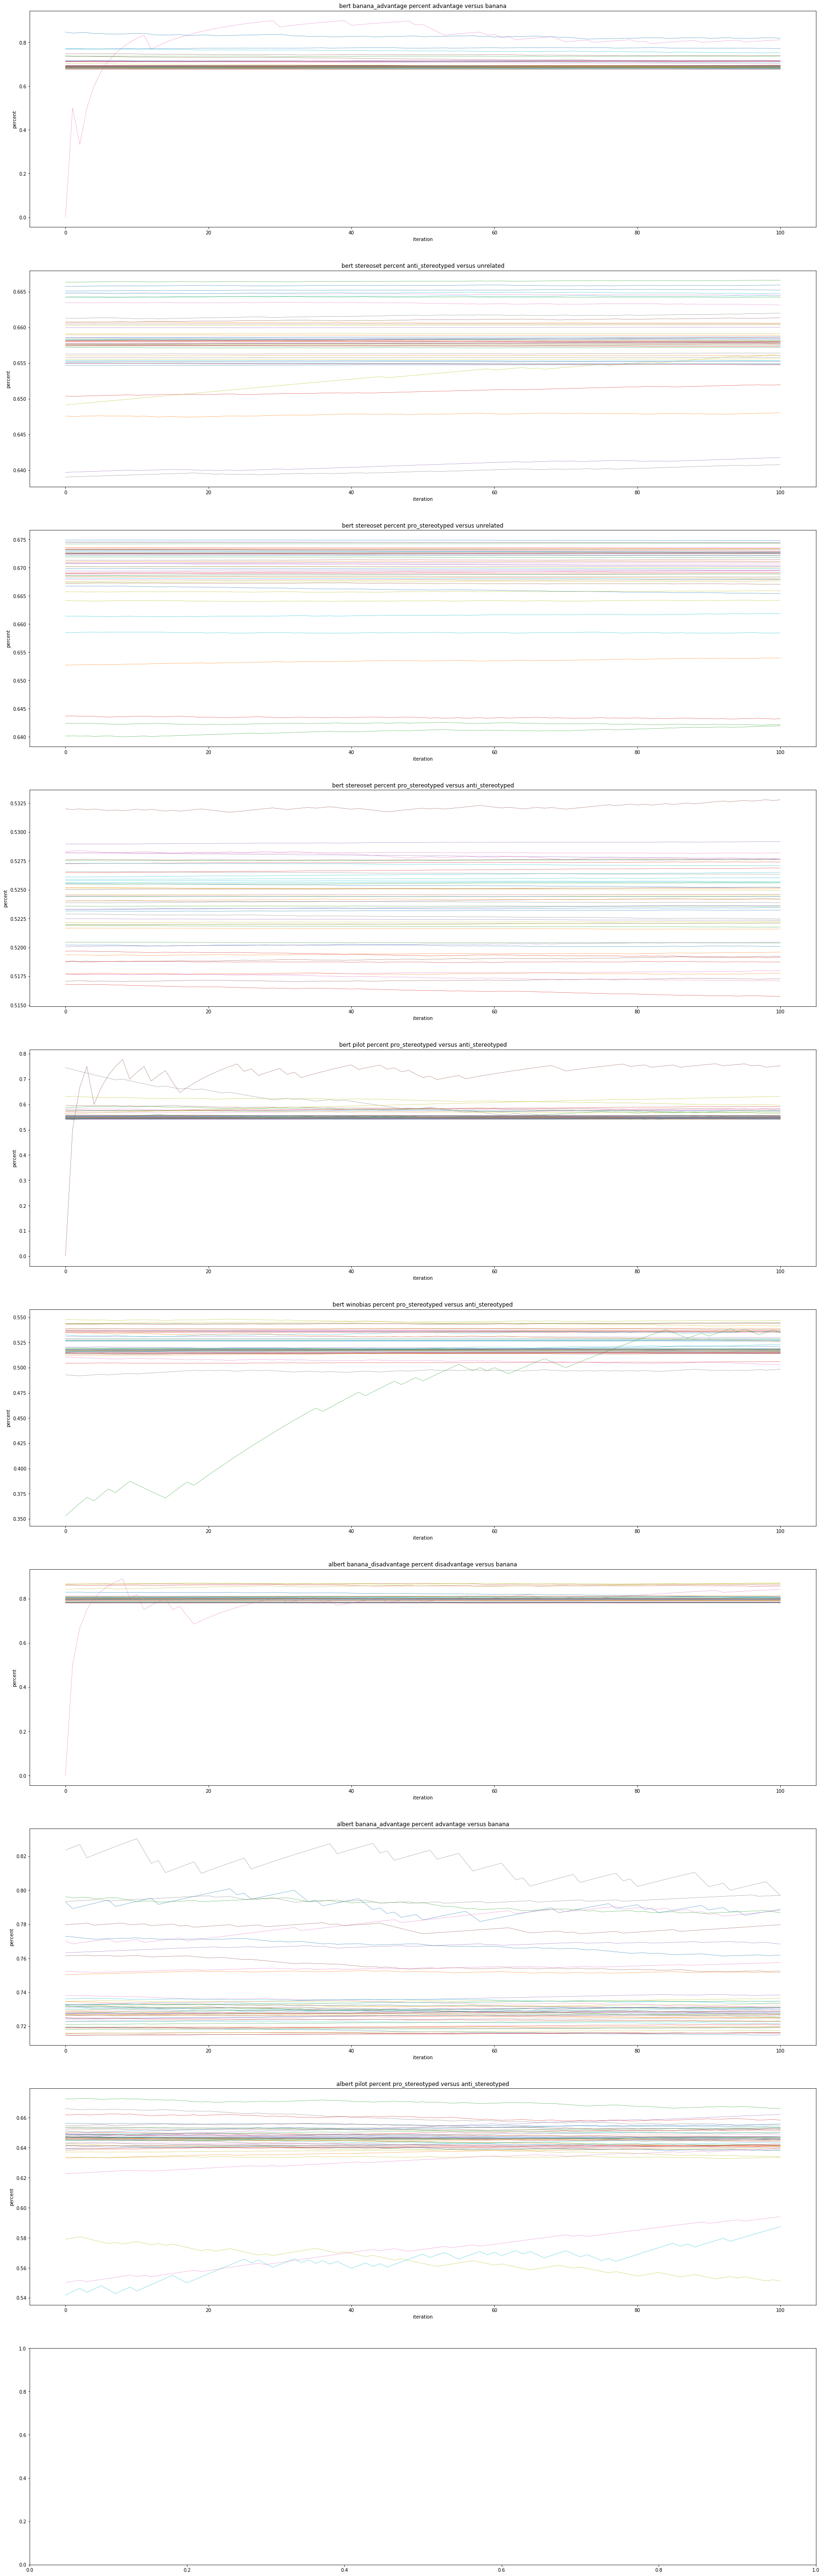

In [4]:
fig, axs = plt.subplots(n)
fig.set_figheight(n*10)
fig.set_figwidth(30)
i = 0
for model in sets:
    for dataset in sets[model]:
        title = sets[model][dataset][0]
        axs[i].set_title(title)
        axs[i].set_xlabel('iteration')
        axs[i].set_ylabel('percent')
        percents = sets[model][dataset][1]
        for sentence_pair in random.sample(percents, k=50):
            axs[i].plot(range(len(sentence_pair)), sentence_pair, marker='', linewidth=0.5)
        i += 1
            